In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
from plotnine import *

In [4]:
# 현재 위치정보를 본다.
# %pwd

In [6]:
pre_sale = pd.read_csv('./apt_price/apartment price.csv', encoding='euc-kr', engine='python')
pre_sale.shape

(4590, 5)

In [8]:
#데이터 5줄을 불러온다.
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [9]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4285 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [10]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [11]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    305
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50669 missing from current font.
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44508 missing from current font.
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
C:\Users\user\anaconda3\lib\site-packages

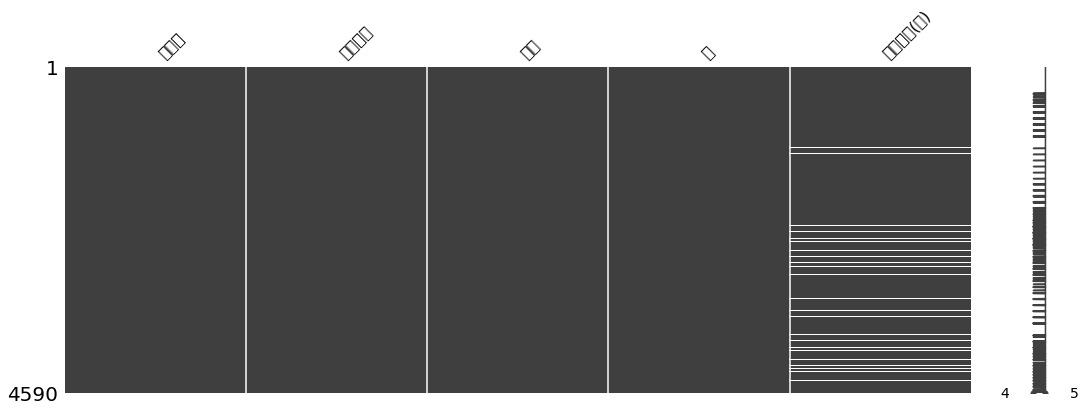

In [12]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [13]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [14]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [15]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [16]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4590 non-null   object 
 1   규모구분     4590 non-null   object 
 2   연도       4590 non-null   object 
 3   월        4590 non-null   object 
 4   분양가격(㎡)  4285 non-null   object 
 5   분양가격     4184 non-null   float64
 6   평당분양가격   4184 non-null   float64
dtypes: float64(2), object(5)
memory usage: 251.1+ KB


In [17]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [18]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    305
분양가격       406
평당분양가격     406
dtype: int64

In [19]:
pre_sale.describe()

,분양가격,평당분양가격
count,4184.000000,4184.000000
mean,3271.654876,10796.461090
std,1302.987924,4299.860149
min,1868.000000,6164.400000
25%,2457.500000,8109.750000
50%,2894.000000,9550.200000
75%,3601.250000,11884.125000
max,13835.000000,45655.500000


In [20]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,4590,4590,4590,4590,4285
unique,17,5,6,12,1813
top,전북,전용면적 102㎡초과,2018,1,3395
freq,270,918,1020,425,18


In [21]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [22]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 102㎡초과          918
전용면적 60㎡이하           918
전용면적 60㎡초과 85㎡이하     918
전체                   918
전용면적 85㎡초과 102㎡이하    918
Name: 규모구분, dtype: int64

In [23]:
pre_sale['지역명'].value_counts()

전북    270
울산    270
인천    270
서울    270
대전    270
충북    270
전남    270
경남    270
대구    270
경기    270
경북    270
강원    270
부산    270
세종    270
충남    270
광주    270
제주    270
Name: 지역명, dtype: int64

### 전국평균 분양가격
#### *groupby 와 pivot_table 활용하기 

In [25]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018   2019   2020
분양가격   count    243    984    899    919    912    227
       mean   2,789  2,934  3,140  3,327  3,693  3,856
       std      977  1,071  1,108  1,186  1,563  1,755
       min    1,868  1,900  1,976  2,076  2,124  2,297
       25%    2,225  2,282  2,365  2,525  2,636  2,667
       50%    2,516  2,672  2,849  2,952  3,395  3,534
       75%    3,026  3,148  3,456  3,698  4,066  4,276
       max    7,092  8,096  7,887  8,098 12,728 13,835
평당분양가격 count    243    984    899    919    912    227
       mean   9,203  9,683 10,360 10,979 12,188 12,725
       std    3,224  3,536  3,655  3,914  5,159  5,792
       min    6,164  6,270  6,521  6,851  7,009  7,580
       25%    7,342  7,531  7,804  8,332  8,697  8,801
       50%    8,303  8,818  9,402  9,742 11,204 11,662
       75%    9,984 10,390 11,405 12,203 13,419 14,109
       max   23,404 26,717 26,027 26,723 42,002 45,656

## 규모별 전국 평균 분양가격

In [29]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018,2019,2020
규모구분,,,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,446","13,332","13,850"
전용면적 60㎡이하,"8,952","9,399","10,246","10,844","11,507","11,967"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,651","11,677","11,857"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,442","12,981","14,975"
전체,"8,893","9,293","9,901","10,676","11,603","11,879"


# 전국 분양가 변동금액
## 규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [30]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019,2020
0,강원,"7,160","7,011","7,127","7,681","8,142","8,226"
1,경기,"10,377","11,220","11,850","13,186","14,469","14,829"
2,경남,"7,586","7,848","8,120","9,019","9,871","10,003"
3,경북,"7,171","7,361","7,795","8,505","8,857","9,002"
4,광주,"8,052","8,899","9,464","9,856","11,823","12,682"
5,대구,"9,232","10,310","11,456","12,076","13,852","14,672"
6,대전,"8,098","8,502","9,045","10,180","11,778","11,733"
7,부산,"10,307","10,430","11,578","12,998","13,116","12,934"
8,서울,"19,725","20,663","21,376","22,889","26,131","26,534"
9,세종,"8,750","8,860","9,135","10,355","11,079","11,411"


In [31]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 4,485,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 188,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,780,059원이다.


연도,지역명,2015,2016,2017,2018,2019,2020,변동액
0,강원,"7,160","7,011","7,127","7,681","8,142","8,226",520
1,경기,"10,377","11,220","11,850","13,186","14,469","14,829",2808
2,경남,"7,586","7,848","8,120","9,019","9,871","10,003",1433
3,경북,"7,171","7,361","7,795","8,505","8,857","9,002",1334
4,광주,"8,052","8,899","9,464","9,856","11,823","12,682",1803
5,대구,"9,232","10,310","11,456","12,076","13,852","14,672",2843
6,대전,"8,098","8,502","9,045","10,180","11,778","11,733",2082
7,부산,"10,307","10,430","11,578","12,998","13,116","12,934",2690
8,서울,"19,725","20,663","21,376","22,889","26,131","26,534",3164
9,세종,"8,750","8,860","9,135","10,355","11,079","11,411",1604
